In [38]:
# Import Dependencies
import requests
import pprint
import pandas as pd
import matplotlib.pyplot as plt

# Import the EIA API key
from api_keys import eia_api_key

In [13]:
# Define the API key and endpoint URL
api_key = eia_api_key

#URL Endpoint
url= f"https://api.eia.gov/v2/natural-gas/prod/sum/data/?api_key={api_key}&frequency=monthly&data[0]=value&facets[series][]=N9010TX2&start=2018-01&end=2023-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

# Set the query parameters
params = {
    "frequency": "monthly",
    "data": [
        "value"
    ],
    "facets": {
        "series": [
            "N9010TX2"
        ]
    },
    "start": "2018-01",
    "end": "2023-01",
    "sort": [
        {
            "column": "period",
            "direction": "desc"
        }
    ],
    "offset": 0,
    "length": 5000
}

#url= f"https://api.eia.gov/v2/natural-gas/prod/sum/data/?api_key={api_key}&{params}"

try:
    # Send the API request
    response = requests.get(url)
    response.raise_for_status()

    # Retrieve the data
    data = response.json()

    # Process the data as needed
    if "data" in data["response"]:
        # Extract the generator counts...
        generator_counts = data["response"]["data"]
        pprint.pprint(data)

    else:
        print("No data available.")
except requests.exceptions.RequestException as e:
    print(f"Error: {e}")    



{'apiVersion': '2.1.4',
 'request': {'command': '/v2/natural-gas/prod/sum/data/',
             'params': {'api_key': 'hhJYAi0zHfiNelKuktGKd5OBjJUqXkcCWMJegytd',
                        'data': ['value'],
                        'end': '2023-01',
                        'facets': {'series': ['N9010TX2']},
                        'frequency': 'monthly',
                        'length': 5000,
                        'offset': 0,
                        'sort': [{'column': 'period', 'direction': 'desc'}],
                        'start': '2018-01'}},
 'response': {'data': [{'area-name': 'TEXAS',
                        'duoarea': 'STX',
                        'period': '2022-12',
                        'process': 'FGW',
                        'process-name': 'Gross Withdrawals',
                        'product': 'EPG0',
                        'product-name': 'Natural Gas',
                        'series': 'N9010TX2',
                        'series-description': 'Texas Natural Gas G

In [20]:
ng_prod_df = pd.json_normalize(data["response"]["data"])
print("Rows in Dataframe: ", len(ng_prod_df))
ng_prod_df.head()

Rows in Dataframe:  60


,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2022-12,STX,TEXAS,EPG0,Natural Gas,FGW,Gross Withdrawals,N9010TX2,Texas Natural Gas Gross Withdrawals (MMcf),988224,MMCF
1,2022-11,STX,TEXAS,EPG0,Natural Gas,FGW,Gross Withdrawals,N9010TX2,Texas Natural Gas Gross Withdrawals (MMcf),956290,MMCF
2,2022-10,STX,TEXAS,EPG0,Natural Gas,FGW,Gross Withdrawals,N9010TX2,Texas Natural Gas Gross Withdrawals (MMcf),988897,MMCF
3,2022-09,STX,TEXAS,EPG0,Natural Gas,FGW,Gross Withdrawals,N9010TX2,Texas Natural Gas Gross Withdrawals (MMcf),953967,MMCF
4,2022-08,STX,TEXAS,EPG0,Natural Gas,FGW,Gross Withdrawals,N9010TX2,Texas Natural Gas Gross Withdrawals (MMcf),969549,MMCF


In [21]:
url = f"https://api.eia.gov/v2/natural-gas/pri/sum/data/?api_key={api_key}&frequency=monthly&data[0]=value&facets[duoarea][]=STX&start=2020-01&end=2023-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

# Set the query parameters
params = {
    "frequency": "monthly",
    "data": [
        "value"
    ],
    "facets": {
        "duoarea": [
            "STX"
        ]
    },
    "start": "2020-01",
    "end": "2023-01",
    "sort": [
        {
            "column": "period",
            "direction": "desc"
        }
    ],
    "offset": 0,
    "length": 5000
}

try:
    # Send the API request
    response = requests.get(url)
    response.raise_for_status()

    # Retrieve the data
    data = response.json()

    # Process the data as needed
    if "data" in data["response"]:
        # Extract the Naturalgas Prices dataset on TX State
        generator_counts = data["response"]["data"]
        pprint.pprint(data)

    else:
        print("No data available.")
except requests.exceptions.RequestException as e:
    print(f"Error: {e}")    


{'apiVersion': '2.1.4',
 'request': {'command': '/v2/natural-gas/pri/sum/data/',
             'params': {'api_key': 'hhJYAi0zHfiNelKuktGKd5OBjJUqXkcCWMJegytd',
                        'data': ['value'],
                        'end': '2023-01',
                        'facets': {'duoarea': ['STX']},
                        'frequency': 'monthly',
                        'length': 5000,
                        'offset': 0,
                        'sort': [{'column': 'period', 'direction': 'desc'}],
                        'start': '2020-01'}},
 'response': {'data': [{'area-name': 'TEXAS',
                        'duoarea': 'STX',
                        'period': '2022-12',
                        'process': 'PEU',
                        'process-name': 'Electric Power Price',
                        'product': 'EPG0',
                        'product-name': 'Natural Gas',
                        'series': 'N3045TX3',
                        'series-description': 'Texas Natural Gas Pri

In [31]:
ng_prices_df = pd.json_normalize(data["response"]["data"])
print("number of rows in Dataframe: ", len(ng_prices_df))
ng_prices_df.head()

number of rows in Dataframe:  288


,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2022-12,STX,TEXAS,EPG0,Natural Gas,PEU,Electric Power Price,N3045TX3,Texas Natural Gas Price Sold to Electric Power...,5.34,$/MCF
1,2022-12,STX,TEXAS,EPG0,Natural Gas,PRS,Price Delivered to Residential Consumers,N3010TX3,Texas Price of Natural Gas Delivered to Reside...,16.01,$/MCF
2,2022-12,STX,TEXAS,EPG0,Natural Gas,VRX,Percent Sold to The Commercial Sector,NA1504_STX_4,Texas Natural Gas % of Total Residential - Sal...,99.90,%
3,2022-12,STX,TEXAS,EPG0,Natural Gas,VFA,% of Industrial Consumers - Sales,N3035TX4,Percent of Industrial Natural Gas Deliveries i...,28.60,%
4,2022-12,STX,TEXAS,EPG0,Natural Gas,VFC,Percent Sold to The Residential Consumers,N3020TX4,Percent of Commercial Natural Gas Deliveries i...,75.90,%


In [30]:
ng_prices_df.describe

<bound method NDFrame.describe of       period duoarea area-name product product-name process  \
0    2022-12     STX     TEXAS    EPG0  Natural Gas     PEU   
1    2022-12     STX     TEXAS    EPG0  Natural Gas     PRS   
2    2022-12     STX     TEXAS    EPG0  Natural Gas     VRX   
3    2022-12     STX     TEXAS    EPG0  Natural Gas     VFA   
4    2022-12     STX     TEXAS    EPG0  Natural Gas     VFC   
..       ...     ...       ...     ...          ...     ...   
283  2020-01     STX     TEXAS    EPG0  Natural Gas     PIN   
284  2020-01     STX     TEXAS    EPG0  Natural Gas     PRS   
285  2020-01     STX     TEXAS    EPG0  Natural Gas     PEU   
286  2020-01     STX     TEXAS    EPG0  Natural Gas     PG1   
287  2020-01     STX     TEXAS    EPG0  Natural Gas     VFC   

                                  process-name        series  \
0                         Electric Power Price      N3045TX3   
1     Price Delivered to Residential Consumers      N3010TX3   
2        Percent 

In [23]:
process_df =  ng_prices_df[["process","process-name"]].drop_duplicates(ignore_index=True)
process_df = process_df.set_index("process")
process_df

,process-name
process,
PEU,Electric Power Price
PRS,Price Delivered to Residential Consumers
VRX,Percent Sold to The Commercial Sector
VFA,% of Industrial Consumers - Sales
VFC,Percent Sold to The Residential Consumers
PCS,Price Delivered to Commercial Sectors
PG1,City Gate Price
PIN,Industrial Price


In [33]:
ng_prices_cleaned_df = ng_prices_df.drop(columns=['duoarea','area-name', 'product', 'product-name'])
ng_prices_cleaned_df

,period,process,process-name,series,series-description,value,units
0,2022-12,PEU,Electric Power Price,N3045TX3,Texas Natural Gas Price Sold to Electric Power...,5.34,$/MCF
1,2022-12,PRS,Price Delivered to Residential Consumers,N3010TX3,Texas Price of Natural Gas Delivered to Reside...,16.01,$/MCF
2,2022-12,VRX,Percent Sold to The Commercial Sector,NA1504_STX_4,Texas Natural Gas % of Total Residential - Sal...,99.90,%
3,2022-12,VFA,% of Industrial Consumers - Sales,N3035TX4,Percent of Industrial Natural Gas Deliveries i...,28.60,%
4,2022-12,VFC,Percent Sold to The Residential Consumers,N3020TX4,Percent of Commercial Natural Gas Deliveries i...,75.90,%
...,...,...,...,...,...,...,...
283,2020-01,PIN,Industrial Price,N3035TX3,Texas Natural Gas Industrial Price (Dollars pe...,2.32,$/MCF
284,2020-01,PRS,Price Delivered to Residential Consumers,N3010TX3,Texas Price of Natural Gas Delivered to Reside...,8.26,$/MCF
285,2020-01,PEU,Electric Power Price,N3045TX3,Texas Natural Gas Price Sold to Electric Power...,1.93,$/MCF
286,2020-01,PG1,City Gate Price,N3050TX3,Natural Gas Citygate Price in Texas (Dollars p...,2.55,$/MCF


In [50]:
ng_prices_cleaned_df = ng_prices_cleaned_df[~ng_prices_cleaned_df['units'].str.contains('%')]
ng_prices_cleaned_df.reset_index(drop=True, inplace=True)
print("Rows in Dataframe: ", len(ng_prices_cleaned_df))
ng_prices_cleaned_df

Rows in Dataframe:  180


,period,process,process-name,series,series-description,value,units
0,2022-12,PEU,Electric Power Price,N3045TX3,Texas Natural Gas Price Sold to Electric Power...,5.34,$/MCF
1,2022-12,PRS,Price Delivered to Residential Consumers,N3010TX3,Texas Price of Natural Gas Delivered to Reside...,16.01,$/MCF
2,2022-12,PCS,Price Delivered to Commercial Sectors,N3020TX3,Texas Price of Natural Gas Sold to Commercial ...,12.33,$/MCF
3,2022-12,PG1,City Gate Price,N3050TX3,Natural Gas Citygate Price in Texas (Dollars p...,6.82,$/MCF
4,2022-12,PIN,Industrial Price,N3035TX3,Texas Natural Gas Industrial Price (Dollars pe...,6.52,$/MCF
...,...,...,...,...,...,...,...
175,2020-01,PCS,Price Delivered to Commercial Sectors,N3020TX3,Texas Price of Natural Gas Sold to Commercial ...,5.57,$/MCF
176,2020-01,PIN,Industrial Price,N3035TX3,Texas Natural Gas Industrial Price (Dollars pe...,2.32,$/MCF
177,2020-01,PRS,Price Delivered to Residential Consumers,N3010TX3,Texas Price of Natural Gas Delivered to Reside...,8.26,$/MCF
178,2020-01,PEU,Electric Power Price,N3045TX3,Texas Natural Gas Price Sold to Electric Power...,1.93,$/MCF


In [51]:
ng_prices_cleaned_df['process-name'].unique()

array(['Electric Power Price', 'Price Delivered to Residential Consumers',
       'Price Delivered to Commercial Sectors', 'City Gate Price',
       'Industrial Price'], dtype=object)

In [37]:
ng_prices_cleaned_df.to_csv("NG_Prices_DF")
process_df.to_csv("NG_Process")

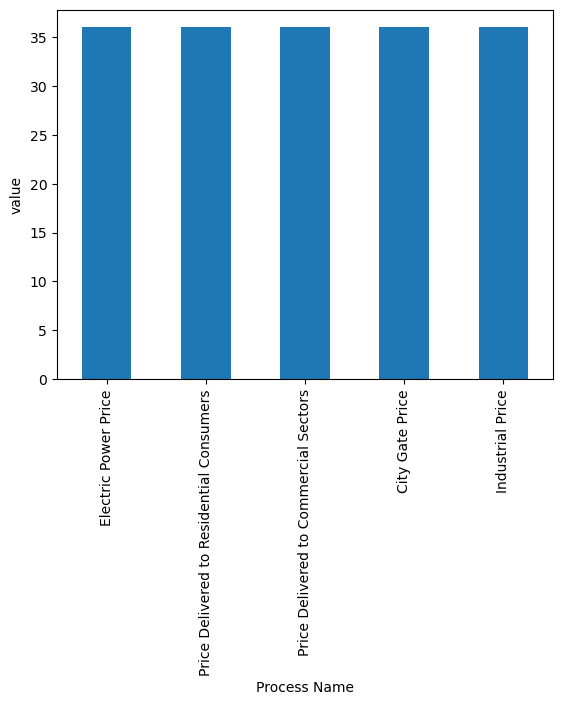

In [47]:
ng_process_plot = ng_prices_cleaned_df['process-name'].value_counts()
ng_process_plot.plot(kind='bar')
plt.xlabel("Process Name")
plt.ylabel("value")
plt.show()

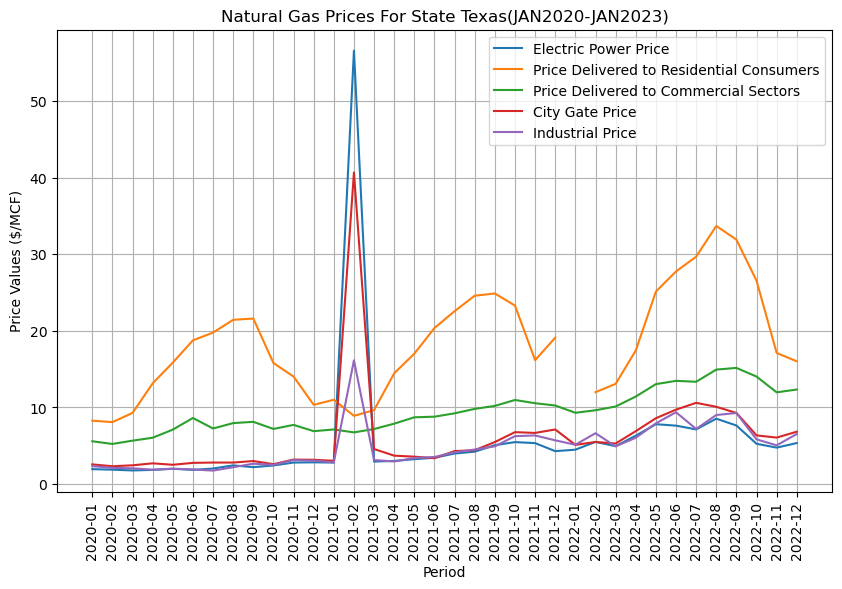

In [52]:
prices_df = ng_prices_cleaned_df
PEU_price = prices_df[prices_df['process'] == 'PEU']
PRS_price = prices_df[prices_df['process'] == 'PRS']
PCS_price = prices_df[prices_df['process'] == 'PCS']
PG1_price = prices_df[prices_df['process'] == 'PG1']
PIN_price = prices_df[prices_df['process'] == 'PIN']

PEU_price = PEU_price.sort_values('period')
PRS_price = PRS_price.sort_values('period')
PCS_price = PCS_price.sort_values('period')
PG1_price = PG1_price.sort_values('period')
PIN_price = PIN_price.sort_values('period')

plt.figure(figsize=(10, 6))
plt.plot(PEU_price['period'], PEU_price['value'], label='Electric Power Price')
plt.plot(PRS_price['period'], PRS_price['value'], label='Price Delivered to Residential Consumers')
plt.plot(PCS_price['period'], PCS_price['value'], label='Price Delivered to Commercial Sectors')
plt.plot(PG1_price['period'], PG1_price['value'], label='City Gate Price')
plt.plot(PIN_price['period'], PIN_price['value'], label='Industrial Price')

plt.xlabel('Period')
plt.ylabel('Price Values ($/MCF)')
plt.title('Natural Gas Prices For State Texas(JAN2020-JAN2023)')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()